# Import necessary modules

In [289]:
import time
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs, make_moons
from sklearn.ensemble import IsolationForest
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from datetime import datetime
import openpyxl
import os


# Import Oil Data

In [290]:
# data = pd.read_csv('huile3.csv', encoding='ISO-8859-1', delimiter=';', dtype={'VISCOSITY 100(V100)': float, 'METER ON FLUID': float},decimal=',', thousands='.')
# data["PROCESS DATE"] = pd.to_datetime(data["PROCESS DATE"], format="%d/%m/%Y %H:%M %S")


data = pd.read_csv('Analyses Huiles.csv', encoding='ISO-8859-1', delimiter=';', dtype={'VISCOSITY 100(V100)': float, 'METER ON FLUID': float},decimal=',', thousands='.')
data = data[["EQUIPEMENT NUMBER","JOBSITE", "MODEL", "PROCESS DATE","COMPOSANT CODE","COMPOSANT DESCRIPTION","METER", "METER ON FLUID", "VISCOSITY 100(V100)","ST","NIT","SUL","ALUMINIUM(AL)","BARIUM(BA)","BORON(B)","CD","CALCUIM(CA)","CHROMIUM(CR)","COPPER(CU)","IRON(FE)","LEAD(PB)","MAGNESIUM(MG)","MAGANESE(MN)","MOLYBDENUM(MO)","NICKEL(NI)","PHOSPHORUS(P)","POTASSIUM(K)","SILICON(SI)","ARGENT(AG)","SODIUM(NA)","SULFUR(S)","TIN(SN)","THALIUM(TI)","VANADIUM(V)","ZINC(ZN)"]]

# data["PROCESS DATE"] = pd.to_datetime(data["PROCESS DATE"], errors='coerce')
data["METER ON FLUID"] = data["METER ON FLUID"]/1000000

c:\temp\ipykernel_12424\131866500.py:5: DtypeWarning: Columns (18,52,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Analyses Huiles.csv', encoding='ISO-8859-1', delimiter=';', dtype={'VISCOSITY 100(V100)': float, 'METER ON FLUID': float},decimal=',', thousands='.')


In [291]:
print('Data type of each column of Dataframe :')
data.info(verbose=True)

# data.to_excel('OIL_DATA.xlsx', index=False)
# print("Résultat exporté en Excel.")

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187921 entries, 0 to 187920
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EQUIPEMENT NUMBER      187921 non-null  object 
 1   JOBSITE                107979 non-null  object 
 2   MODEL                  121865 non-null  object 
 3   PROCESS DATE           187921 non-null  object 
 4   COMPOSANT CODE         187808 non-null  object 
 5   COMPOSANT DESCRIPTION  153058 non-null  object 
 6   METER                  186907 non-null  float64
 7   METER ON FLUID         146962 non-null  float64
 8   VISCOSITY 100(V100)    138235 non-null  float64
 9   ST                     80047 non-null   float64
 10  NIT                    80059 non-null   float64
 11  SUL                    80087 non-null   float64
 12  ALUMINIUM(AL)          187676 non-null  float64
 13  BARIUM(BA)             181835 non-null  float64
 

# Gestion du tableau de correspendance

In [292]:
data_correspendance = pd.read_csv('tableau_de_correspendance.csv', encoding='ISO-8859-1', delimiter=';')
# data_correspendance.dropna(subset=[' Mots correspondants à moteur'], inplace=True)
print('Data type of each column of Dataframe :')
data_correspendance.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   EQUIPEMENT NUMBER                   556 non-null    object
 1    Mots correspondants à moteur       556 non-null    object
 2    Mots correspondants à compresseur  556 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


Import selected Data to excel file

In [293]:
data_correspendance.to_excel('output.xlsx', index=False)
print("Résultat exporté en Excel.")

Résultat exporté en Excel.


Generer les tables de correspendance

# Select the Data for oil anomaly


select which data you want to select

In [294]:
etude1 = "VISCOSITY 100(V100)"
etude2 = "IRON(FE)"

select engine or compressor

In [295]:
print(data_correspendance[' Mots correspondants à compresseur'])
moteur = data_correspendance[' Mots correspondants à moteur']
moteur_list = moteur.tolist()
compresseur = data_correspendance[' Mots correspondants à compresseur']
compresseur_list = compresseur.tolist()
componenet = moteur
nom_liste = 'moteur'
selected_data = data[(data['COMPOSANT DESCRIPTION'].isin(componenet)) & (data['EQUIPEMENT NUMBER'].isin(data_correspendance['EQUIPEMENT NUMBER']))]
# selected_data['COMPOSANT DESCRIPTION'] = selected_data['COMPOSANT DESCRIPTION'].replace(moteur_list, nom_liste)
# selected_data = selected_data.dropna(subset=[etude1, etude2])
# add composnt /11/10/ le fichier de jean

# selected_data.to_excel('output.xlsx', index=False)
# print("Résultat exporté en Excel.")

0             COMPRESSEUR AIR
1                        COMP
2              OMPRESSEUR AIR
3              CMPRESSEUR AIR
4              COPRESSEUR AIR
                ...          
551             50 COMPRESSOR
552              50COMPRESSOR
553            50 COMPRESSSOR
554               COMPRESSEUR
555    COMPRESSOR NATURAL GAS
Name:  Mots correspondants à compresseur, Length: 556, dtype: object


In [296]:
selected_data = selected_data.drop_duplicates()

In [297]:
print('Data type of each column of Dataframe :')
selected_data.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 46 to 177733
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EQUIPEMENT NUMBER      1054 non-null   object 
 1   JOBSITE                969 non-null    object 
 2   MODEL                  1052 non-null   object 
 3   PROCESS DATE           1054 non-null   object 
 4   COMPOSANT CODE         1053 non-null   object 
 5   COMPOSANT DESCRIPTION  1054 non-null   object 
 6   METER                  1051 non-null   float64
 7   METER ON FLUID         771 non-null    float64
 8   VISCOSITY 100(V100)    1031 non-null   float64
 9   ST                     801 non-null    float64
 10  NIT                    801 non-null    float64
 11  SUL                    801 non-null    float64
 12  ALUMINIUM(AL)          1053 non-null   float64
 13  BARIUM(BA)             1051 non-null   float64
 14  BORON(B)          

Import selected Data to excel file

In [298]:
selected_data.to_excel('selected_oil_data.xlsx', index=False)
print("Résultat exporté en Excel.")

Résultat exporté en Excel.


In [299]:
selected_data = selected_data.dropna(subset=[etude1, etude2])
print('Data type of each column of Dataframe :')
selected_data.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 46 to 177733
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EQUIPEMENT NUMBER      1031 non-null   object 
 1   JOBSITE                946 non-null    object 
 2   MODEL                  1029 non-null   object 
 3   PROCESS DATE           1031 non-null   object 
 4   COMPOSANT CODE         1030 non-null   object 
 5   COMPOSANT DESCRIPTION  1031 non-null   object 
 6   METER                  1028 non-null   float64
 7   METER ON FLUID         749 non-null    float64
 8   VISCOSITY 100(V100)    1031 non-null   float64
 9   ST                     779 non-null    float64
 10  NIT                    779 non-null    float64
 11  SUL                    779 non-null    float64
 12  ALUMINIUM(AL)          1031 non-null   float64
 13  BARIUM(BA)             1029 non-null   float64
 14  BORON(B)          

# Show the selected Data without transformation

VISCOSITY 100(V100)
Résultats_des_analyses_d_huiles_du couple_VISCOSITY 100(V100)_et_IRON(FE)_pour_les_moteur_des_D60_et_D65.png


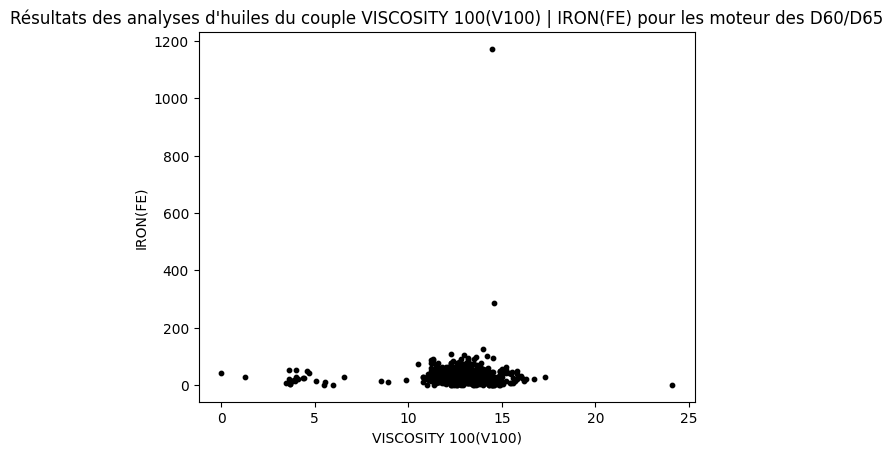

In [300]:
plt.scatter(selected_data[etude1], selected_data[etude2], s=10,color="black")
# plt.ylim(0, 20)
# plt.xlim(0, 500)
plt.xlabel(etude1)
plt.ylabel(etude2)
plt.title(f"Résultats des analyses d'huiles du couple {etude1} | {etude2} pour les {nom_liste} des D60/D65")
print(etude1)
filename = f"Résultats_des_analyses_d_huiles_du couple_{etude1}_et_{etude2}_pour_les_{nom_liste}_des_D60_et_D65.png"
print(filename)
plt.savefig(filename)

# Show the selected Data with numpy transformation

(1031,)
Résultats_des_analyses_d_huiles_du couple_VISCOSITY 100(V100)_et_IRON(FE)_pour_les_moteur_des_D60_et_D65.png


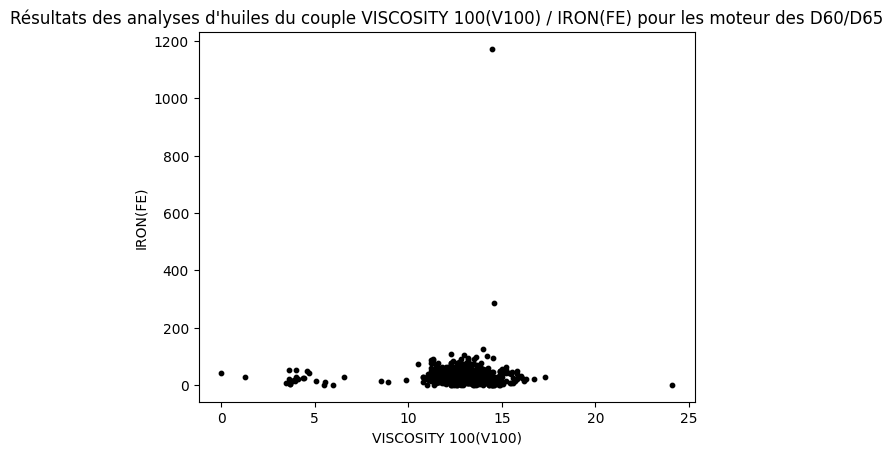

In [301]:
selected_data_etude1 = selected_data[etude1].to_numpy()
print(selected_data_etude1.shape)
selected_data_etude2 = selected_data[etude2].to_numpy()
plt.scatter(selected_data_etude1, selected_data_etude2, s=10,color="black")
plt.xlabel(etude1)
plt.ylabel(etude2)
plt.title(f"Résultats des analyses d'huiles du couple {etude1} / {etude2} pour les {nom_liste} des D60/D65")
filename = f"Résultats_des_analyses_d_huiles_du couple_{etude1}_et_{etude2}_pour_les_{nom_liste}_des_D60_et_D65.png"
print(filename)
plt.savefig(filename)

(1031, 5)
VISCOSITY 100(V100)
Résultats_des_analyses_d_huiles_du couple_VISCOSITY 100(V100)_et_IRON(FE)_pour_les_moteur_des_D60_et_D65.png


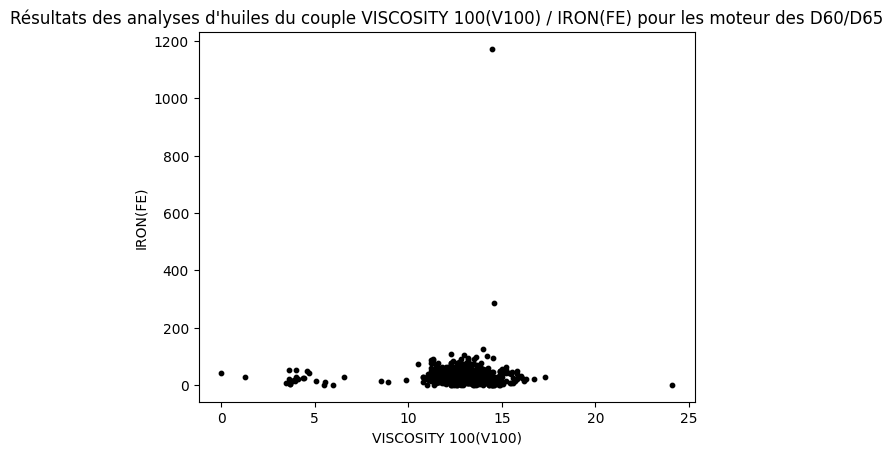

In [302]:
# selected_etude_1 = np.column_stack((selected_data_etude1, selected_data_etude2))
                                   
selected_etude_1 = np.column_stack((selected_data_etude1, selected_data_etude2,selected_data["EQUIPEMENT NUMBER"],selected_data["COMPOSANT DESCRIPTION"],selected_data["PROCESS DATE"]))

print(selected_etude_1.shape)
plt.scatter(selected_etude_1[:,0], selected_etude_1[:,1], s=10,color="black")
# plt.xlim(0, 15000)
plt.xlabel(etude1)
plt.ylabel(etude2)
plt.title(f"Résultats des analyses d'huiles du couple {etude1} / {etude2} pour les {nom_liste} des D60/D65")
print(etude1)
filename = f"Résultats_des_analyses_d_huiles_du couple_{etude1}_et_{etude2}_pour_les_{nom_liste}_des_D60_et_D65.png"
print(filename)
plt.savefig(filename)


(1031, 2)
VISCOSITY 100(V100)
Résultats_des_analyses_d_huiles_du couple_VISCOSITY 100(V100)_et_IRON(FE)_pour_les_moteur_des_D60_et_D65_normalisées_(MinMaxScaler).png


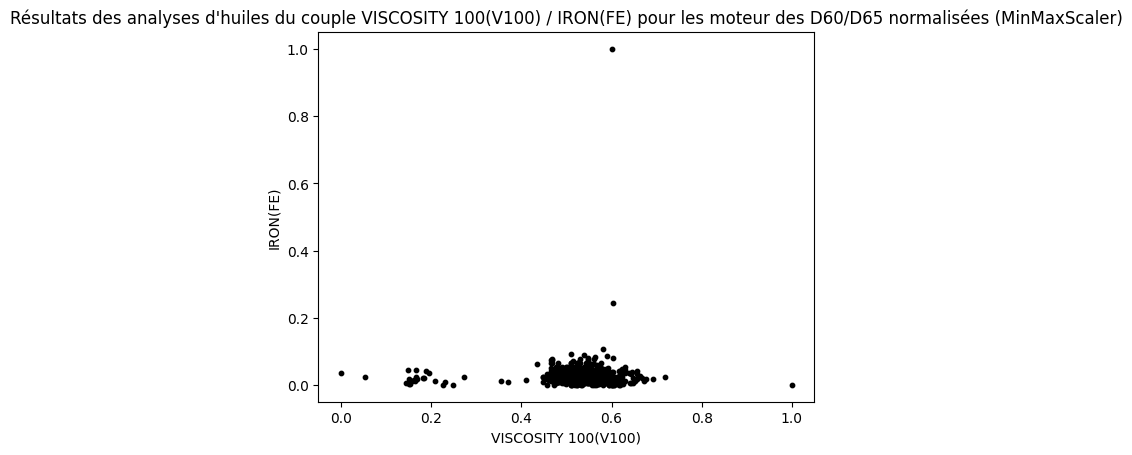

In [303]:
scaler = MinMaxScaler()

# Normaliser les valeurs de X
selected_etude_1_scaled = scaler.fit_transform(selected_etude_1[:,0:2])
print(selected_etude_1_scaled.shape)

plt.scatter(selected_etude_1_scaled[:,0], selected_etude_1_scaled[:,1],s=10,color="black")


#voir pourquoi ça ne marche pas
# E1 = scaler.fit_transform(selected_etude_1[:,0])
# E2 = scaler.fit_transform(selected_etude_1[:,1])

# plt.scatter(E1, E2 ,s=10,color="black")

# plt.scatter(selected_etude_1[:,0], selected_etude_1[:,1], alpha=0.5,color="black", marker='x')
# plt.xlim(0, 15000)
plt.xlabel(etude1)
plt.ylabel(etude2)
plt.title(f"Résultats des analyses d'huiles du couple {etude1} / {etude2} pour les {nom_liste} des D60/D65 normalisées (MinMaxScaler)")
print(etude1)
filename = f"Résultats_des_analyses_d_huiles_du couple_{etude1}_et_{etude2}_pour_les_{nom_liste}_des_D60_et_D65_normalisées_(MinMaxScaler).png"
print(filename)
plt.savefig(filename)

In [304]:
scaled_data = pd.DataFrame({
    "EQUIPEMENT NUMBER" : selected_data["EQUIPEMENT NUMBER"],
    "COMPOSANT DESCRIPTION" : selected_data["COMPOSANT DESCRIPTION"],
    "PROCESS DATE" : selected_data["PROCESS DATE"],
    etude1: selected_etude_1_scaled[:, 0],
    etude2: selected_etude_1_scaled[:, 1]

})

print('Data type of each column of Dataframe :')
scaled_data.info(verbose=True)

scaled_data.to_excel('scaled_data.xlsx', index=False)
print("Résultat exporté en Excel.")

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 46 to 177733
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EQUIPEMENT NUMBER      1031 non-null   object 
 1   COMPOSANT DESCRIPTION  1031 non-null   object 
 2   PROCESS DATE           1031 non-null   object 
 3   VISCOSITY 100(V100)    1031 non-null   float64
 4   IRON(FE)               1031 non-null   float64
dtypes: float64(2), object(3)
memory usage: 48.3+ KB
Résultat exporté en Excel.


(1031, 5)
VISCOSITY 100(V100)
Résultats_des_analyses_d_huiles_du couple_VISCOSITY 100(V100)_et_IRON(FE)_pour_les_moteur_des_D60_et_D65_normalisées_(MinMaxScaler).png


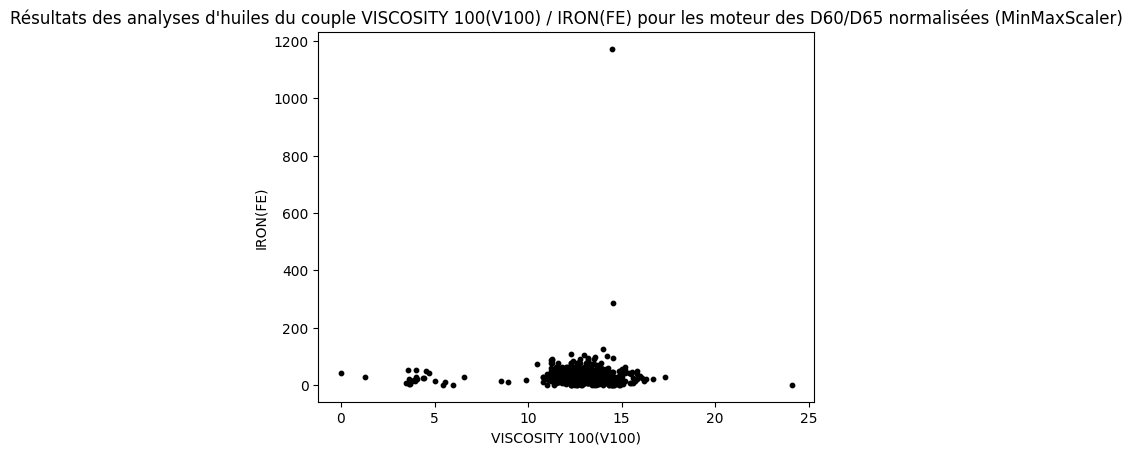

In [305]:
selected_etude_1_inverse_trans = scaler.inverse_transform(selected_etude_1_scaled)

print(selected_etude_1.shape)

plt.scatter(selected_etude_1_inverse_trans[:,0], selected_etude_1_inverse_trans[:,1],s=10,color="black")


#voir pourquoi ça ne marche pas
# E1 = scaler.fit_transform(selected_etude_1[:,0])
# E2 = scaler.fit_transform(selected_etude_1[:,1])

# plt.scatter(E1, E2 ,s=10,color="black")

# plt.scatter(selected_etude_1[:,0], selected_etude_1[:,1], alpha=0.5,color="black", marker='x')
# plt.xlim(0, 15000)
plt.xlabel(etude1)
plt.ylabel(etude2)
plt.title(f"Résultats des analyses d'huiles du couple {etude1} / {etude2} pour les {nom_liste} des D60/D65 normalisées (MinMaxScaler)")
print(etude1)
filename = f"Résultats_des_analyses_d_huiles_du couple_{etude1}_et_{etude2}_pour_les_{nom_liste}_des_D60_et_D65_normalisées_(MinMaxScaler).png"
print(filename)
plt.savefig(filename)

In [306]:
# Create the DataFrame
rescaled_data = pd.DataFrame({
    "EQUIPEMENT NUMBER" : selected_data["EQUIPEMENT NUMBER"],
    "COMPOSANT DESCRIPTION" : selected_data["COMPOSANT DESCRIPTION"],
    "PROCESS DATE" : selected_data["PROCESS DATE"],
    etude1: selected_etude_1_inverse_trans[:, 0],
    etude2: selected_etude_1_inverse_trans[:, 1]

})

print('Data type of each column of Dataframe :')
rescaled_data.info(verbose=True)

rescaled_data.to_excel('rescaled_data.xlsx', index=False)
print("Résultat exporté en Excel.")

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 46 to 177733
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EQUIPEMENT NUMBER      1031 non-null   object 
 1   COMPOSANT DESCRIPTION  1031 non-null   object 
 2   PROCESS DATE           1031 non-null   object 
 3   VISCOSITY 100(V100)    1031 non-null   float64
 4   IRON(FE)               1031 non-null   float64
dtypes: float64(2), object(3)
memory usage: 48.3+ KB
Résultat exporté en Excel.


In [307]:
# scaler = RobustScaler()

# # Normaliser les valeurs de X
# selected_etude_1 = scaler.fit_transform(selected_etude_1)
# print(selected_etude_1.shape)
# plt.scatter(selected_etude_1[:,0], selected_etude_1[:,1],s=10,color="black")
# # plt.scatter(selected_etude_1[:,0], selected_etude_1[:,1], alpha=0.5,color="black", marker='x')
# # plt.xlim(0, 15000)
# plt.xlabel(etude1)
# plt.ylabel(etude2)
# plt.title(f"Résultats des analyses d'huiles du couple {etude1} / {etude2} pour les {nom_liste} des D60/D65 normalisées (RobustScaler)")
# filename = f"Résultats_des_analyses_d_huiles_du couple_{etude1}_et_{etude2}_pour_les_{nom_liste}_des_D60_et_D65_normalisées_(RobustScaler).png"
# print(filename)
# plt.savefig(filename)

# Show real anomalies

Group by equipement number

In [308]:
# grouped_data = selected_data.groupby("EQUIPEMENT NUMBER")


import anomaly data with Date de début de l'OT from oil analysis

In [309]:
# moteur_panne = 'Moteur'
# compresseur_panne = 'Circuit Pneumatique'
# panne_component = compresseur_panne

# data_panne = pd.read_csv('pannes.csv',encoding='ISO-8859-1',dtype={'Heures': float},decimal=',' , delimiter=';')

# data_panne = data_panne[["Modèle","Machine","Nature","Ordre de travail ","Date de début de l'OT","Système","Compteur machine","Description OT","Heures"]]

# data_panne["Date de début de l'OT"] = pd.to_datetime(data_panne["Date de début de l'OT"], format="%d/%m/%Y")

# selected_data_panne = data_panne[(data_panne['Machine'].isin(data_correspendance['EQUIPEMENT NUMBER'])) & (data_panne['Nature'].isin(["R2","R2U","R2P"])) & (data_panne['Système'].isin([panne_component]))]

# # print('Data type of each column of Dataframe :')
# # selected_data_panne.info(verbose=True)

# grouped_data_panne = selected_data_panne.groupby(['Ordre de travail ','Machine',"Date de début de l'OT"]).agg({'Heures': 'sum'})

# grouped_data_panne = grouped_data_panne.loc[grouped_data_panne.sum(axis=1) >= 24]

# # grouped_data_panne.to_excel('resultat.xlsx', engine='openpyxl')

# selected_data_panne = selected_data_panne.drop_duplicates(subset=['Ordre de travail '])
# del selected_data_panne['Heures']
# merged_data_panne = pd.merge(selected_data_panne, grouped_data_panne, on='Ordre de travail ')

# print('Data type of each column of Dataframe :')
# merged_data_panne.info(verbose=True)
# merged_data_panne.to_excel('merged_data_panne.xlsx', engine='openpyxl')



In [310]:
# moteur_panne = 'Moteur'
# compresseur_panne = 'Circuit Pneumatique'
# panne_component = compresseur_panne

# data_panne = pd.read_csv('pannes.csv',encoding='ISO-8859-1',dtype={'Heures': float},decimal=',' , delimiter=';')

# data_panne = data_panne[["Modèle","Machine","Nature","Ordre de travail ","Date de début de l'OT","Système","Compteur machine","Description OT","Heures"]]

# data_panne["Date de début de l'OT"] = pd.to_datetime(data_panne["Date de début de l'OT"], format="%d/%m/%Y")

# selected_data_panne = data_panne[(data_panne['Machine'].isin(data_correspendance['EQUIPEMENT NUMBER'])) & (data_panne['Nature'].isin(["R2","R2U","R2P"])) & (data_panne['Système'].isin([panne_component]))]

# grouped_data_panne = selected_data_panne.groupby(['Ordre de travail ']).agg({'Heures': 'sum'})

# grouped_data_panne = grouped_data_panne.loc[grouped_data_panne.sum(axis=1) >= 24]

# data_panne = data_panne.drop_duplicates(subset=['Ordre de travail '])
# del data_panne['Heures']
# merged_data_panne = pd.merge(data_panne, grouped_data_panne, on='Ordre de travail ')

# print('Data type of each column of Dataframe :')
# merged_data_panne.info(verbose=True)
# merged_data_panne.to_excel('merged_data_panne.xlsx', engine='openpyxl')





montrer les anomalies

In [311]:
# for i in range(len(merged_data_panne)):
#     print("Machine "+ merged_data_panne.loc[i, "Machine"])
#     print( merged_data_panne.loc[i, "Date de début de l'OT"])
    

In [312]:
# selected_data_etude1 = selected_data[etude1].to_numpy()
# selected_data_etude2 = selected_data[etude2].to_numpy()
# # selected_data_date = selected_data['PROCESS DATE'].to_numpy().astype('datetime64[ns]')
# selected_data_machine = selected_data["EQUIPEMENT NUMBER"].to_numpy()

# selected_data_date = selected_data['PROCESS DATE'].dt.strftime('%Y-%m-%d')

# selected_etude_1_test = np.column_stack((selected_data_etude1, selected_data_etude2,selected_data_date,selected_data_machine))
# print(selected_etude_1_test.shape)

# # for date in selected_data_date:
# #     print(date)
# #     element_type = type(date)
# #     print(element_type)

# # selected_etude_1_test[:, 2] = selected_data_date
# # print(selected_data_date)

# for i in range(selected_etude_1_test.shape[0]):
#     print(selected_etude_1_test[i,2])
#     print(type(selected_etude_1_test[i,2]))

# # for date in selected_data_date:
# #     print(date)
# #     element_type = type(date)
# #     print(element_type)

# # print(selected_etude_1_test.shape)
# # print(selected_etude_1_test[1,:])
# # print(merged_data_panne.iloc[1, :])


In [313]:

# selected_data_date_panne = merged_data_panne["Date de début de l'OT"].dt.strftime('%Y-%m-%d')

# # for date in selected_data_date_panne:
# #     print(date)
# #     element_type = type(date)
# #     print(element_type)

# # selected_data_date_panne = selected_data_date_panne["Date de début de l'OT"].dt.strftime('%Y-%m-%d')


# # for k in range(len(merged_data_panne)):
# #     print(type(merged_data_panne.iloc[k, 4]))
# #     print(merged_data_panne.iloc[k, 4])

In [314]:

# anomalies = np.ones(selected_etude_1_test.shape[0], dtype=int)
# s = 0
# date_format = "%Y-%m-%d"
# shape = np.array(["o", "."])
# colors = np.array(["#377eb8", "#ff7f00"])

# panne_numero_ot_excel = []
# panne_ot_description_excel = []
# panne_heures =[]
# panne_date_ot_excel = []
# machine_excel =[]
# val_1_exel = []
# val_2_exel = []
# analyse_huile_date = []


# for i in range(selected_etude_1_test.shape[0]):
#         for k in range(len(merged_data_panne)):
#             date_panne = datetime.strptime(selected_data_date_panne[k], date_format)
#             date_analyse = datetime.strptime(selected_etude_1_test[i,2], date_format)
#             difference = date_panne - date_analyse
#             if (merged_data_panne.iloc[k, 1] == selected_etude_1_test[i,3]) and ( difference.days < 30) and ( difference.days > 0):
#                 # print("----")
#                 # print(merged_data_panne.iloc[k, 1])
#                 # print(merged_data_panne.iloc[k, 3])
#                 # print(selected_data_date_panne[k])
#                 # print(selected_etude_1_test[i,2])
#                 # print("----")
#                 anomalies[i] =-1
#                 panne_numero_ot_excel.append(merged_data_panne.iloc[k, 3])
#                 panne_ot_description_excel.append(merged_data_panne.iloc[k, 7])
#                 panne_heures.append(merged_data_panne.iloc[k, 8])
#                 panne_date_ot_excel.append(selected_data_date_panne[k])
#                 machine_excel.append(merged_data_panne.iloc[k, 1])
#                 analyse_huile_date.append(selected_etude_1_test[i,2])
#                 val_1_exel.append(selected_etude_1_test[i,0])
#                 val_2_exel.append(selected_etude_1_test[i,1])



# # print(anomalies.shape)  
# # print(type(anomalies) ) 
# # print(selected_data_etude1.shape )
# # print(selected_data_etude2.shape )
# for i in range(len(anomalies)):
#      anomalies[i]=(anomalies[i]+1)//2
# # anomalies = anomalies + 1 // 2
# # print(anomalies)
# # print(anomalies.shape)
# # plt.scatter(selected_etude_1_test[:,0], selected_etude_1_test[:,1], s=1, color=colors[anomalies])
# plt.scatter(selected_etude_1_test[anomalies == 0, 0], selected_etude_1_test[anomalies == 0, 1], s=50, marker='+', color="black", label="Analyses d'huiles faites 24 heures avant une panne majeure.")
# plt.scatter(selected_etude_1_test[anomalies == 1, 0], selected_etude_1_test[anomalies == 1, 1], s=1, marker='o')
# plt.xlabel(etude1)
# plt.ylabel(etude2)
# plt.tight_layout()
# plt.legend()
# plt.show()

# # plt.xlim(0, 150)
# # plt.ylim(0, 50)
# # plt.scatter(selected_data_etude1, selected_data_etude2,  marker=shape[(anomalies + 1) // 2])
# # plt.show

# # i need to do the same thing with shape
# # colors = np.array(["#377eb8", "#ff7f00"])
# #         plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

In [315]:
# anomalies_pannes_analyse = pd.DataFrame({
#     'machine': machine_excel,
#     'Ordre de travail': panne_numero_ot_excel,
#     'panne_date_ot_excel': panne_date_ot_excel,
#     'analyse_huile_date': analyse_huile_date,
#     'panne_heures': panne_heures,
#     'val_1_exel': val_1_exel,
#     'val_2_exel': val_2_exel,
#     'panne_ot_description_excel': panne_ot_description_excel
# })

# anomalies_pannes_analyse.to_excel('panne_analyse.xlsx', engine='openpyxl')

# Préparation des couples de variables

Select all data

In [316]:
etude1_1 = "IRON(FE)"
etude1_2 = "SILICON(SI)"

etude2_1 = "ALUMINIUM(AL)"
etude2_2 = "SILICON(SI)"

etude3_1 = "ALUMINIUM(AL)"
etude3_2 = "IRON(FE)"

etude4_1 = "SILICON(SI)"
etude4_2 = "SODIUM(NA)"

etude5_1 = "VISCOSITY 100(V100)"
etude5_2 = "SODIUM(NA)"

etude6_1 = "SODIUM(NA)"
etude6_2 = "LEAD(PB)"

etude7_1 = "VISCOSITY 100(V100)"
etude7_2 = "IRON(FE)"


# Drop any row where at least one of these columns has a NaN value
FE_SI = selected_data.dropna(subset=[etude1_1, etude1_2])
AL_SI = selected_data.dropna(subset=[etude2_1, etude2_2])
AL_FE = selected_data.dropna(subset=[etude3_1, etude3_2])
SI_NA = selected_data.dropna(subset=[etude4_1, etude4_2])
VIS_NA = selected_data.dropna(subset=[etude5_1, etude5_2])
NA_PB = selected_data.dropna(subset=[etude6_1, etude6_1])
VIS_FE = selected_data.dropna(subset=[etude7_1, etude7_1])


FE_SI_etude_data_1 = FE_SI[etude1_1].to_numpy()
FE_SI_etude_data_2 = FE_SI[etude1_2].to_numpy()
FE_SI_EQUIPEMENT_NUMBER = FE_SI["EQUIPEMENT NUMBER"]
FE_SI_COMPOSANT_DESCRIPTION = FE_SI["COMPOSANT DESCRIPTION"]
FE_SI_PROCESS_DATE = FE_SI["PROCESS DATE"]



AL_SI_etude_data_1 = AL_SI[etude2_1].to_numpy()
AL_SI_etude_data_2 = AL_SI[etude2_2].to_numpy()
AL_SI_EQUIPEMENT_NUMBER = AL_SI["EQUIPEMENT NUMBER"]
AL_SI_COMPOSANT_DESCRIPTION = AL_SI["COMPOSANT DESCRIPTION"]
AL_SI_PROCESS_DATE = AL_SI["PROCESS DATE"]



AL_FE_etude_data_1 = AL_FE[etude3_1].to_numpy()
AL_FE_etude_data_2 = AL_FE[etude3_2].to_numpy()
AL_FE_EQUIPEMENT_NUMBER = AL_FE["EQUIPEMENT NUMBER"]
AL_FE_COMPOSANT_DESCRIPTION = AL_FE["COMPOSANT DESCRIPTION"]
AL_FE_PROCESS_DATE = AL_FE["PROCESS DATE"]



SI_NA_etude_data_1 = SI_NA[etude4_1].to_numpy()
SI_NA_etude_data_2 = SI_NA[etude4_2].to_numpy()
SI_NA_EQUIPEMENT_NUMBER = SI_NA["EQUIPEMENT NUMBER"]
SI_NA_COMPOSANT_DESCRIPTION = SI_NA["COMPOSANT DESCRIPTION"]
SI_NA_PROCESS_DATE = SI_NA["PROCESS DATE"]



VIS_NA_etude_data_1 = VIS_NA[etude5_1].to_numpy()
VIS_NA_etude_data_2 = VIS_NA[etude5_2].to_numpy()
VIS_NA_EQUIPEMENT_NUMBER = VIS_NA["EQUIPEMENT NUMBER"]
VIS_NA_COMPOSANT_DESCRIPTION = VIS_NA["COMPOSANT DESCRIPTION"]
VIS_NA_PROCESS_DATE = VIS_NA["PROCESS DATE"]




NA_PB_etude_data_1 = NA_PB[etude6_1].to_numpy()
NA_PB_etude_data_2 = NA_PB[etude6_2].to_numpy()
NA_PB_EQUIPEMENT_NUMBER = NA_PB["EQUIPEMENT NUMBER"]
NA_PB_COMPOSANT_DESCRIPTION = NA_PB["COMPOSANT DESCRIPTION"]
NA_PB_PROCESS_DATE = NA_PB["PROCESS DATE"]



VIS_FE_etude_data_1 = VIS_FE[etude7_1].to_numpy()
VIS_FE_etude_data_2 = VIS_FE[etude7_2].to_numpy()
VIS_FE_EQUIPEMENT_NUMBER = VIS_FE["EQUIPEMENT NUMBER"]
VIS_FE_COMPOSANT_DESCRIPTION = VIS_FE["COMPOSANT DESCRIPTION"]
VIS_FE_PROCESS_DATE = VIS_FE["PROCESS DATE"]





etude_FE_SI = np.column_stack((FE_SI_etude_data_1, FE_SI_etude_data_2))
etude_AL_SI = np.column_stack((AL_SI_etude_data_1, AL_SI_etude_data_2))
etude_AL_FE = np.column_stack((AL_FE_etude_data_1, AL_FE_etude_data_2))
etude_SI_NA = np.column_stack((SI_NA_etude_data_1, SI_NA_etude_data_2))
etude_VIS_NA = np.column_stack((VIS_NA_etude_data_1, VIS_NA_etude_data_2))
etude_NA_PB= np.column_stack((NA_PB_etude_data_1, NA_PB_etude_data_2))
etude_VIS_FE = np.column_stack((VIS_FE_etude_data_1, VIS_FE_etude_data_2))



Normalisation pour MinMaxScaler

<img src="min_max.png">

In [317]:
# scaler = RobustScaler()
# scaler = MinMaxScaler()

# etude_FE_SI = scaler.fit_transform(etude_FE_SI)
# etude_AL_SI = scaler.fit_transform(etude_AL_SI)
# etude_AL_FE = scaler.fit_transform(etude_AL_FE)
# etude_SI_NA = scaler.fit_transform(etude_SI_NA)
# etude_VIS_NA = scaler.fit_transform(etude_VIS_NA)
# etude_NA_PB = scaler.fit_transform(etude_NA_PB)
# etude_VIS_FE = scaler.fit_transform(etude_VIS_FE)

# X_original = scaler.inverse_transform(X_scaled)

# Comparaison entre les modèles

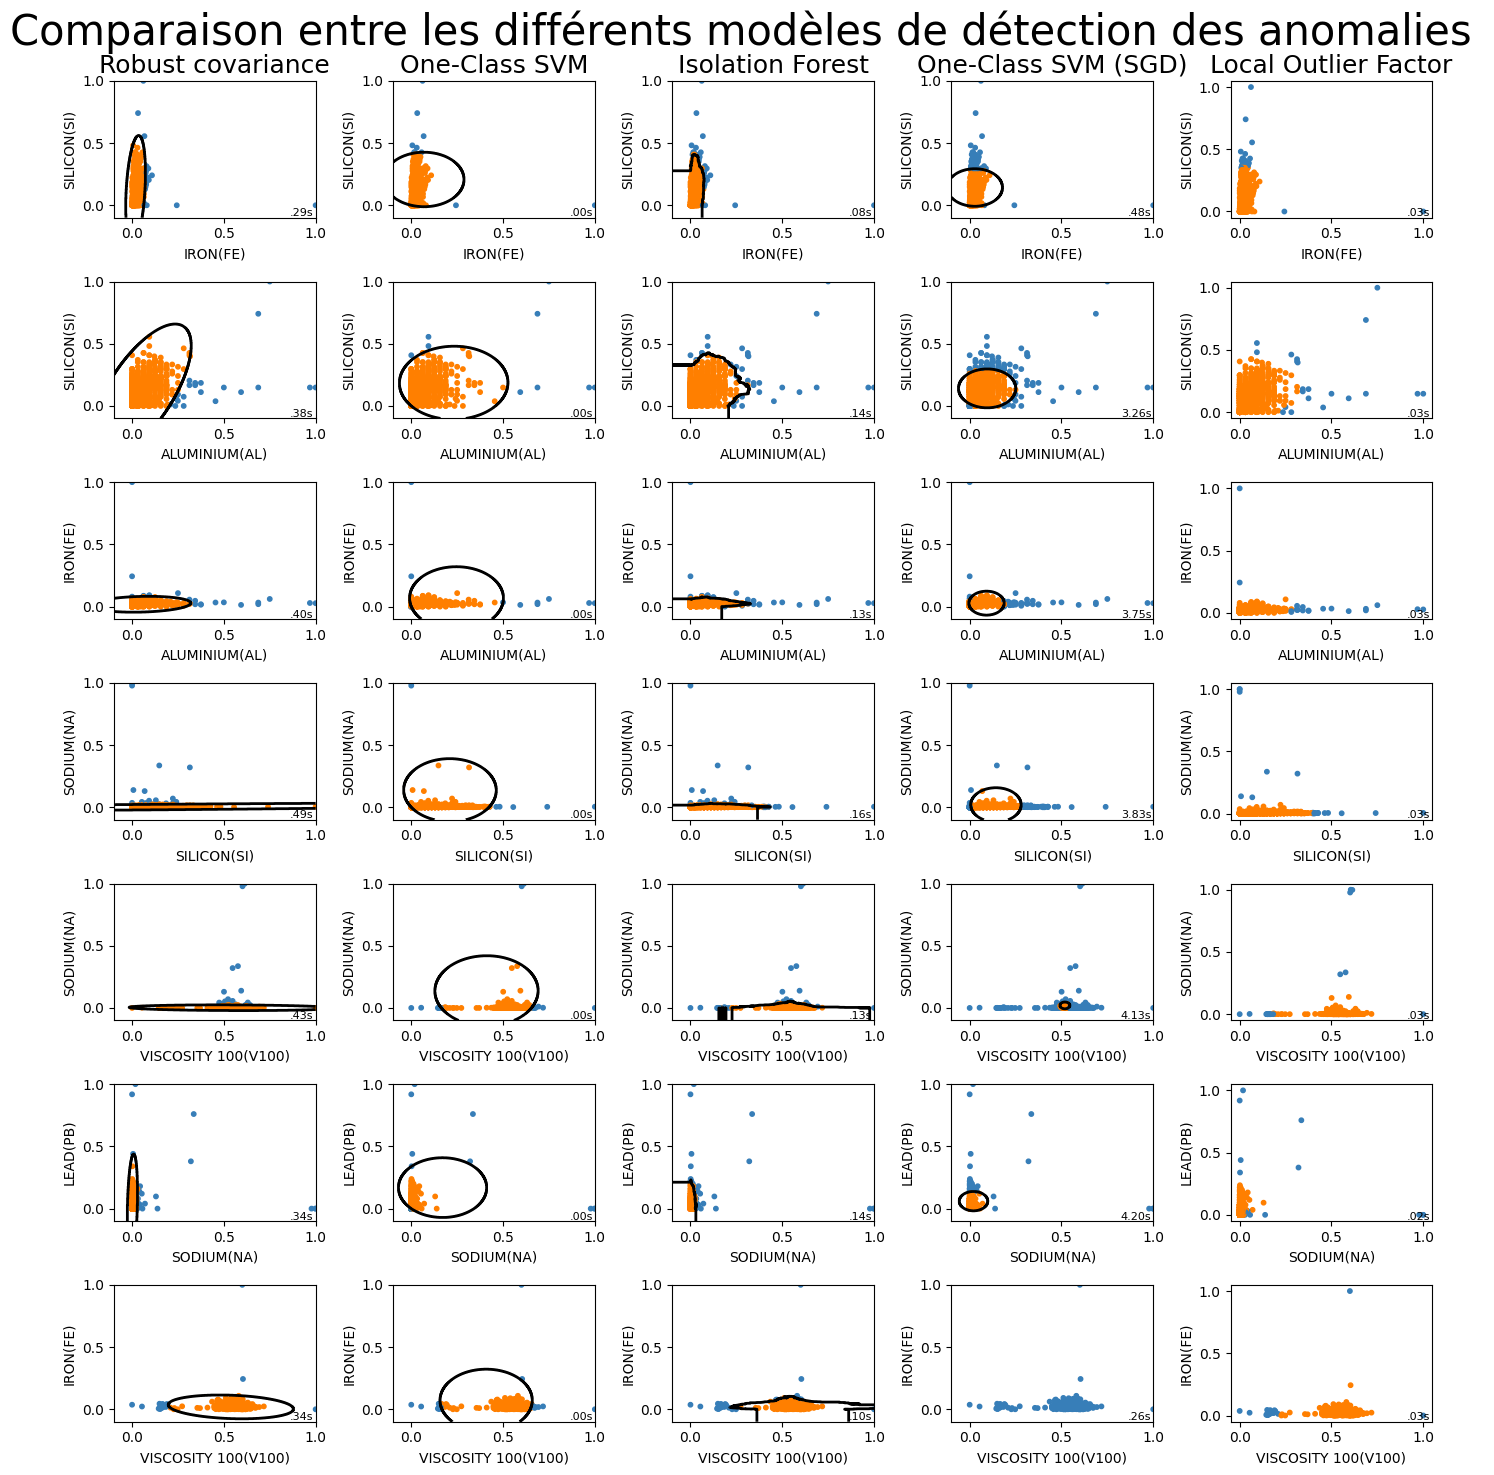

In [318]:
matplotlib.rcParams["contour.negative_linestyle"] = "solid"
scaler = MinMaxScaler()

# selected_etude_1 = np.column_stack((selected_data_etude1, selected_data_etude2))
# print(selected_etude_1.shape)
# Example settings
# n_samples = 1200
# outliers_fraction = 0.05

n_samples = 400
outliers_fraction = 0.02
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=0.02, random_state=20),
        # EllipticEnvelope(contamination=0.1, random_state=20,support_fraction=0.8),
    ),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "Isolation Forest",
        IsolationForest(contamination=0.03, random_state=42),
    ),

    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=900),
            SGDOneClassSVM(
                nu=0.1,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
        (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=200, contamination=outliers_fraction),
    ),
]

# # Define datasets
# blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    (
        "FE_SI",
        etude_FE_SI,
    ),
    (
        "AL_SI",
        etude_AL_SI,
    ),
    (
        "AL_FE",
        etude_AL_FE,
    ),
    (
        "SI_NA",
        etude_SI_NA
    ),
    (
        "VIS_NA",
        etude_VIS_NA
    ),
    (
        "NA_PB",
        etude_NA_PB
    ),
    (
        "VIS_FE",
        etude_VIS_FE
    ),
]

# Compare given classifiers under given settings


plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 15))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
mod_num = 1
rng = np.random.RandomState(42)

for i_dataset, (data_name,X) in enumerate(datasets):

    X = scaler.fit_transform(X)

    match data_name:
        case "FE_SI" :
            xx, yy = np.meshgrid(np.linspace(-0.1, 1, 1000), np.linspace(-0.1, 1, 1000))
        case "AL_SI" : 
            xx, yy = np.meshgrid(np.linspace(-0.1, 1, 1000), np.linspace(-0.1, 1, 1000))
        case "AL_FE" : 
            xx, yy = np.meshgrid(np.linspace(-0.1, 1, 1000), np.linspace(-0.1, 1, 1000))
        case "SI_NA" : 
            xx, yy = np.meshgrid(np.linspace(-0.1, 1, 1000), np.linspace(-0.1, 1, 1000))
        case "VIS_NA" : 
            xx, yy = np.meshgrid(np.linspace(-0.1, 1, 1000), np.linspace(-0.1, 1, 1000))
        case "NA_PB" : 
            xx, yy = np.meshgrid(np.linspace(-0.1, 1, 1000), np.linspace(-0.1, 1, 1000))
        case "VIS_FE" : 
            xx, yy = np.meshgrid(np.linspace(-0.1, 1, 1000), np.linspace(-0.1, 1, 1000))


    

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        # plt.subplots_adjust(wspace=0.35, hspace=0.1)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            
            border = np.c_[xx.ravel(), yy.ravel()]
            # print(xx.shape)
            Z = algorithm.predict(border)
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        colors = np.array(["#377eb8", "#ff7f00"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
        

        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=8,
            horizontalalignment="right",
        )   
         
        match plot_num:
            case 1 | 2 | 3 | 4 | 5:
                plt.xlabel(etude1_1)
                plt.ylabel(etude1_2)

            case 6 | 7 | 8 | 9 | 10:
                plt.xlabel(etude2_1)
                plt.ylabel(etude2_2)

            case 11 | 12 | 13 | 14 | 15:
                plt.xlabel(etude3_1)
                plt.ylabel(etude3_2)

            case 16 | 17 | 18 | 19 | 20 :
                plt.xlabel(etude4_1)
                plt.ylabel(etude4_2)
            
            case 21 | 22 | 23 | 24 | 25 :
                plt.xlabel(etude5_1)
                plt.ylabel(etude5_2)
            case 26 | 27 | 28 | 29 | 30 :
                plt.xlabel(etude6_1)
                plt.ylabel(etude6_2)
            case 31 | 32 | 33 | 34 | 35 :
                plt.xlabel(etude7_1)
                plt.ylabel(etude7_2)


        # match mod_num:
        #     case 1 :
        #         plt.xlim(-100, 500)
        #         plt.ylim(-100, 210)
        #     case 2 :
        #         plt.xlim(-5, 8)
        #         plt.ylim(-4, 10)
        #     case 3 :
        #         plt.xlim(-20, 600)
        #         plt.ylim(-20, 30)
        #     case 4 :
        #         plt.xlim(-5, 15)
        #         plt.ylim(-5, 10)
        

        # print (plot_num)
        plot_num += 1
        
    mod_num += 1


plt.suptitle('Comparaison entre les différents modèles de détection des anomalies ', fontsize=30)
plt.tight_layout()
plt.show()

In [319]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 5), np.linspace(0, 10, 5))
border = np.c_[xx.ravel(), yy.ravel()]
print(xx.shape)
print('__________')
print(yy.shape)
print('__________')
print(border.shape)
print('__________')
print(xx)
print('__________')
print(yy)
print('__________')
print(border)

(5, 5)
__________
(5, 5)
__________
(25, 2)
__________
[[-10.  -5.   0.   5.  10.]
 [-10.  -5.   0.   5.  10.]
 [-10.  -5.   0.   5.  10.]
 [-10.  -5.   0.   5.  10.]
 [-10.  -5.   0.   5.  10.]]
__________
[[ 0.   0.   0.   0.   0. ]
 [ 2.5  2.5  2.5  2.5  2.5]
 [ 5.   5.   5.   5.   5. ]
 [ 7.5  7.5  7.5  7.5  7.5]
 [10.  10.  10.  10.  10. ]]
__________
[[-10.    0. ]
 [ -5.    0. ]
 [  0.    0. ]
 [  5.    0. ]
 [ 10.    0. ]
 [-10.    2.5]
 [ -5.    2.5]
 [  0.    2.5]
 [  5.    2.5]
 [ 10.    2.5]
 [-10.    5. ]
 [ -5.    5. ]
 [  0.    5. ]
 [  5.    5. ]
 [ 10.    5. ]
 [-10.    7.5]
 [ -5.    7.5]
 [  0.    7.5]
 [  5.    7.5]
 [ 10.    7.5]
 [-10.   10. ]
 [ -5.   10. ]
 [  0.   10. ]
 [  5.   10. ]
 [ 10.   10. ]]


# Gestion des alertes

In [320]:
selected_etude_1 = np.column_stack((selected_data_etude1, selected_data_etude2))
# print(selected_etude_1.shape)
# Example settings
n_samples = 1200
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
anomaly_algorithms = [

     (
        "Robust covariance",
        EllipticEnvelope(contamination=0.015, random_state=20),
        # EllipticEnvelope(contamination=0.1, random_state=20,support_fraction=0.8),
    ),

]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    (
        "FE_SI",
        etude_FE_SI,
    ),
    (
        "AL_SI",
        etude_AL_SI,
    ),
    (
        "AL_FE",
        etude_AL_FE,
    ),
    (
        "SI_NA",
        etude_SI_NA
    ),
    (
        "VIS_NA",
        etude_VIS_NA
    ),
    (
        "NA_PB",
        etude_NA_PB
    ),
    (
        "VIS_FE",
        etude_VIS_FE
    ),
]

# Compare given classifiers under given settings


plot_num = 1
mod_num = 1


for i_dataset, (data_name,X) in enumerate(datasets):
    
    X = scaler.fit_transform(X)

    column_anomaly_name = "anomaly detected on " + data_name
    filename = "anomaly_results_on_" + data_name+".xlsx"
    filename_final = "anomaly_results_on_" + data_name+"_final"+".xlsx"
    filename_scaled = "anomaly_results_on_" + data_name+"_scaled"+".xlsx"
    print(filename_scaled)
    var1, var2 = data_name.split('_')
    print(var1)
    print(var2)

    for name, algorithm in anomaly_algorithms:

        algorithm.fit(X)


        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        print(y_pred)



        plot_num += 1

    match data_name:
        case "FE_SI" :
            EQUIPEMENT_NUMBER = FE_SI_EQUIPEMENT_NUMBER
            COMPOSANT_DESCRIPTION = FE_SI_COMPOSANT_DESCRIPTION
            PROCESS_DATE = FE_SI_PROCESS_DATE
        case "AL_SI" :
            EQUIPEMENT_NUMBER = AL_SI_EQUIPEMENT_NUMBER
            COMPOSANT_DESCRIPTION = AL_SI_COMPOSANT_DESCRIPTION
            PROCESS_DATE = AL_SI_PROCESS_DATE
        case "AL_FE" :
            EQUIPEMENT_NUMBER = AL_FE_EQUIPEMENT_NUMBER
            COMPOSANT_DESCRIPTION = AL_FE_COMPOSANT_DESCRIPTION
            PROCESS_DATE = AL_FE_PROCESS_DATE
        case "SI_NA" :
            EQUIPEMENT_NUMBER = SI_NA_EQUIPEMENT_NUMBER
            COMPOSANT_DESCRIPTION = SI_NA_COMPOSANT_DESCRIPTION
            PROCESS_DATE = SI_NA_PROCESS_DATE
        case "VIS_NA" :
            EQUIPEMENT_NUMBER = VIS_NA_EQUIPEMENT_NUMBER
            COMPOSANT_DESCRIPTION = VIS_NA_COMPOSANT_DESCRIPTION
            PROCESS_DATE = VIS_NA_PROCESS_DATE
        case "NA_PB" :
            EQUIPEMENT_NUMBER = NA_PB_EQUIPEMENT_NUMBER
            COMPOSANT_DESCRIPTION = NA_PB_COMPOSANT_DESCRIPTION
            PROCESS_DATE = NA_PB_PROCESS_DATE
        case "VIS_FE" :
            EQUIPEMENT_NUMBER = VIS_FE_EQUIPEMENT_NUMBER
            COMPOSANT_DESCRIPTION = VIS_FE_COMPOSANT_DESCRIPTION
            PROCESS_DATE = VIS_FE_PROCESS_DATE





    anomaly_data_scaled = pd.DataFrame({
    "EQUIPEMENT NUMBER" : EQUIPEMENT_NUMBER,
    "COMPOSANT DESCRIPTION" : COMPOSANT_DESCRIPTION,
    "PROCESS DATE" : PROCESS_DATE ,
    var1: X[:,0],
    var2: X[:,1],
    column_anomaly_name : y_pred
    })


    X_rescaled = scaler.inverse_transform(X)


    anomaly_data = pd.DataFrame({
    "EQUIPEMENT NUMBER" : EQUIPEMENT_NUMBER,
    "COMPOSANT DESCRIPTION" : COMPOSANT_DESCRIPTION,
    "PROCESS DATE" : PROCESS_DATE ,
    var1: X_rescaled[:,0],
    var2: X_rescaled[:,1],
    column_anomaly_name : y_pred
    })


    anomaly_data_final = pd.DataFrame({
    "EQUIPEMENT NUMBER" : EQUIPEMENT_NUMBER,
    "COMPOSANT DESCRIPTION" : COMPOSANT_DESCRIPTION,
    "PROCESS DATE" : PROCESS_DATE ,
    column_anomaly_name : y_pred
    })

    anomaly_data = anomaly_data[anomaly_data[column_anomaly_name] != 1]
    anomaly_data_scaled = anomaly_data_scaled[anomaly_data_scaled[column_anomaly_name] != 1]
    anomaly_data_final = anomaly_data_final[anomaly_data_final[column_anomaly_name] != 1]

    print('Data type of each column of Dataframe :')
    anomaly_data.info(verbose=True)

    anomaly_data.to_excel(filename, index=False)
    print("Résultat exporté en Excel.")

    print('Data type of each column of Dataframe :')
    anomaly_data_scaled.info(verbose=True)

    anomaly_data_scaled.to_excel(filename_scaled, index=False)
    print("Résultat exporté en Excel.")

    print('Data type of each column of Dataframe :')
    anomaly_data_final.info(verbose=True)

    anomaly_data_final.to_excel(filename_final, index=False)
    print("Résultat exporté en Excel.")

    del anomaly_data_final
    del anomaly_data
    del anomaly_data_scaled
           
    mod_num += 1


anomaly_results_on_FE_SI_scaled.xlsx
FE
SI
[ 1  1  1 ...  1 -1  1]
Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 9206 to 176169
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EQUIPEMENT NUMBER          16 non-null     object 
 1   COMPOSANT DESCRIPTION      16 non-null     object 
 2   PROCESS DATE               16 non-null     object 
 3   FE                         16 non-null     float64
 4   SI                         16 non-null     float64
 5   anomaly detected on FE_SI  16 non-null     int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 832.0+ bytes
Résultat exporté en Excel.
Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 9206 to 176169
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     -------------- 

In [321]:
def copy_excel_with_history(filename):
    # Split the file name and extension
    base, ext = os.path.splitext(filename)
    
    if ext.lower() != '.xlsx':
        print("Error: The file is not an .xlsx file.")
        return
    
    # Create the new file name
    new_filename = f"{base}_history{ext}"
    
    # Load the workbook
    workbook = openpyxl.load_workbook(filename)
    
    # Save it with the new name
    workbook.save(new_filename)
    
    print(f"File copied to {new_filename}")



In [322]:
# for i_dataset, (data_name,X) in enumerate(datasets):
#     filename = "anomaly_results_on_" + data_name+".xlsx"
#     filename_scaled = "anomaly_results_on_" + data_name+"_scaled"+".xlsx"
#     copy_excel_with_history(filename)
#     copy_excel_with_history(filename_scaled)

In [323]:
# can i add the option to only take the last element

def alert_system(old_file,recent_file,output_file):
    # Load the two Excel files into DataFrames
    old_df = pd.read_excel(old_file)
    recent_df = pd.read_excel(recent_file)
    # Identify rows that are only present in the recent file
    # This assumes that all columns need to be identical to match rows
    unique_to_recent = recent_df[~recent_df.apply(tuple, axis=1).isin(old_df.apply(tuple, axis=1))]
    # Save the result to a new Excel file
    unique_to_recent.to_excel(output_file, index=False)

    print(f"A new file '{output_file}' has been created with elements only present in the recent file.")


# # Define the file names
# old_file = 'anomaly_results_on_SI_NA_history.xlsx'
# recent_file = 'anomaly_results_on_SI_NA.xlsx'
# # output_file = 'anomaly_results_on_SI_NA_alert.xlsx'


for i_dataset, (data_name,X) in enumerate(datasets):
    old_file = "anomaly_results_on_" + data_name+"_history"+".xlsx"
    recent_file = "anomaly_results_on_" + data_name+".xlsx"
    output_file = "anomaly_results_on_" + data_name+"_alert"+".xlsx"
    alert_system(old_file,recent_file,output_file)

    # here you need to copy new results into history

    filename = "anomaly_results_on_" + data_name+".xlsx"
    filename_scaled = "anomaly_results_on_" + data_name+"_scaled"+".xlsx"
    copy_excel_with_history(filename)
    copy_excel_with_history(filename_scaled)
    

A new file 'anomaly_results_on_FE_SI_alert.xlsx' has been created with elements only present in the recent file.
File copied to anomaly_results_on_FE_SI_history.xlsx
File copied to anomaly_results_on_FE_SI_scaled_history.xlsx
A new file 'anomaly_results_on_AL_SI_alert.xlsx' has been created with elements only present in the recent file.
File copied to anomaly_results_on_AL_SI_history.xlsx
File copied to anomaly_results_on_AL_SI_scaled_history.xlsx
A new file 'anomaly_results_on_AL_FE_alert.xlsx' has been created with elements only present in the recent file.
File copied to anomaly_results_on_AL_FE_history.xlsx
File copied to anomaly_results_on_AL_FE_scaled_history.xlsx
A new file 'anomaly_results_on_SI_NA_alert.xlsx' has been created with elements only present in the recent file.
File copied to anomaly_results_on_SI_NA_history.xlsx
File copied to anomaly_results_on_SI_NA_scaled_history.xlsx
A new file 'anomaly_results_on_VIS_NA_alert.xlsx' has been created with elements only present in

In [324]:
for i_dataset, (data_name,X) in enumerate(datasets):
    filename_final = "anomaly_results_on_" + data_name+"_final"+".xlsx"
    temporary_df = pd.read_excel(filename_final)
    if (i_dataset==0):
        combined_alertes = temporary_df
    else:
        combined_alertes = pd.merge(combined_alertes,temporary_df, on=['EQUIPEMENT NUMBER', 'COMPOSANT DESCRIPTION','PROCESS DATE'], how='outer')

print('Data type of each column of Dataframe :')
combined_alertes.info(verbose=True)

combined_alertes = combined_alertes.drop_duplicates()

combined_alertes.to_excel("combined_alertes_history_test.xlsx", index=False)
print("Résultat exporté en Excel.")        
    

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EQUIPEMENT NUMBER           62 non-null     object 
 1   COMPOSANT DESCRIPTION       62 non-null     object 
 2   PROCESS DATE                62 non-null     object 
 3   anomaly detected on FE_SI   16 non-null     float64
 4   anomaly detected on AL_SI   16 non-null     float64
 5   anomaly detected on AL_FE   16 non-null     float64
 6   anomaly detected on SI_NA   16 non-null     float64
 7   anomaly detected on VIS_NA  16 non-null     float64
 8   anomaly detected on NA_PB   16 non-null     float64
 9   anomaly detected on VIS_FE  16 non-null     float64
dtypes: float64(7), object(3)
memory usage: 5.0+ KB
Résultat exporté en Excel.
